Data Pre-Processing

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)


In [163]:
df=pd.read_csv("cleaned_data.csv")
df.shape

(8523, 12)

-Data Cleaning
 Handling Missing values
 Handling Missing values
 Handling Duplicates
 Check data type
 Understand the dataset

Check Null Values

In [164]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder

In [169]:
df.drop("Item_Identifier",axis=1,inplace=True)


In [165]:
# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year

In [166]:
current_year

2024

In [167]:
df['Outlet_age'] = current_year-df['Outlet_Establishment_Year']

In [170]:
df.drop("Outlet_Establishment_Year",axis=1,inplace=True)

In [171]:
df.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,5.92,Regular,0.019278,Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25


In [172]:
X=df.drop(labels=["Item_Outlet_Sales"],axis=1)
y=df[["Item_Outlet_Sales"]]

In [173]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,25
1,5.920,Regular,0.019278,Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,15
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,25
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,26
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,37
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,37
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,22
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,20
8521,7.210,Regular,0.145221,Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,15


In [174]:
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [175]:
numerical_features = [feature for feature in X.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in X.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_age']

We have 6 categorical features : ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


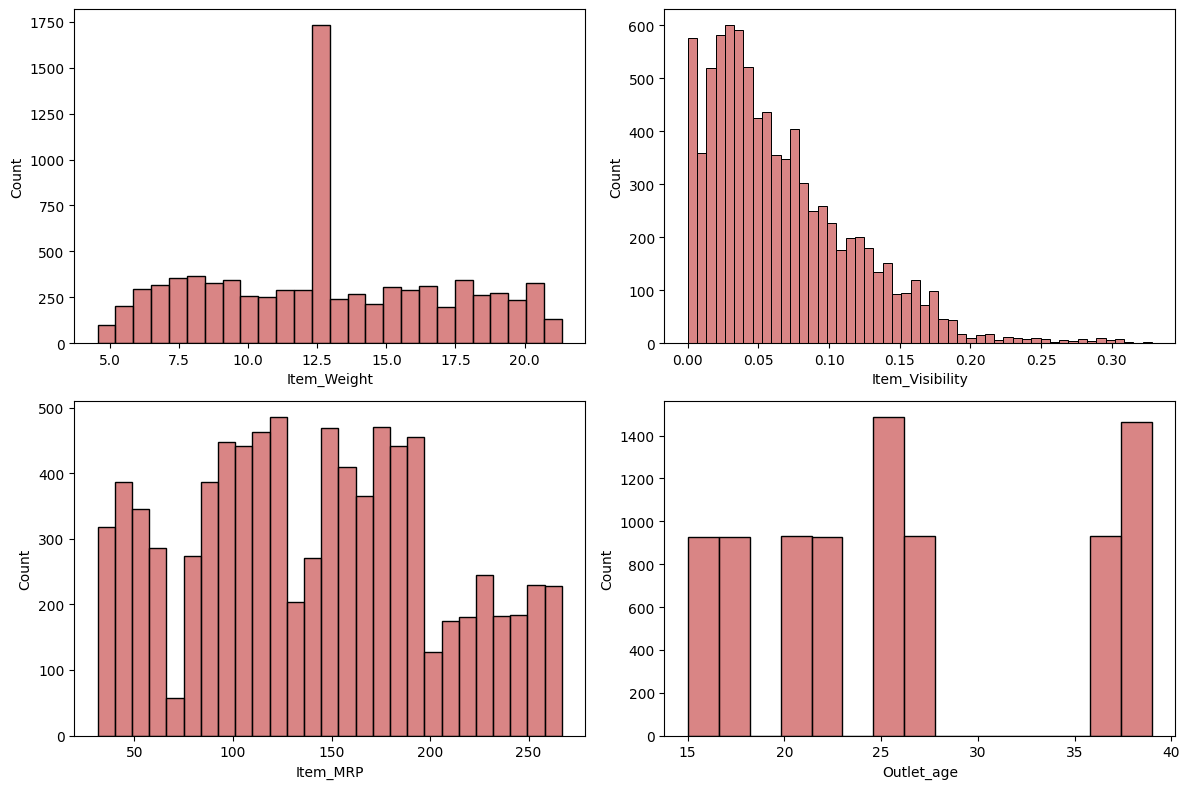

In [176]:
# Check if columns exist in X
required_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_age']
for col in required_cols:
    if col not in X.columns:
        print(f"Column '{col}' is not in the DataFrame")

# Plotting the data
plt.figure(figsize=(12, 8))
for i, col in enumerate(required_cols):
    if col in X.columns:
        plt.subplot(2, 2, i+1)
        sns.histplot(x=X[col], color='indianred')
        plt.xlabel(col)
        plt.tight_layout()

plt.show()


In [177]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['Item_Visibility']
X_copy = pt.fit_transform(X[transform_features])

In [178]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

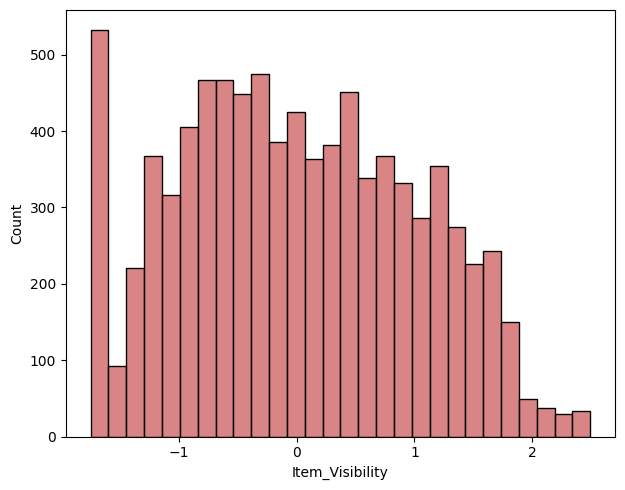

In [179]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [180]:
X_copy.skew(axis=0, skipna=True)

Item_Visibility    0.124279
dtype: float64

In [236]:
X["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [237]:
# Define your numerical and categorical features
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_age']
ordinal_features = ['Outlet_Location_Type', 'Outlet_Size']
onehot_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type']
transform_columns= ['Item_Visibility']

# Define the categories
Outlet_Location_Type_categories = ['Tier 1', 'Tier 3', 'Tier 2']
Outlet_Size_categories = ['Medium', 'High', 'Small']
Item_Fat_Content_categories = ['Low Fat', 'Regular']
Item_Type_categories = ['Dairy', 'Drinks', 'Meat', 'Fruits and Vegetables', 'Household',
       'Baking Goods', 'Foods', 'Breakfast', 'Health and Hygiene',
       'Canned', 'Breads', 'Others']
Outlet_Identifier_categories = ['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
                             'OUT017', 'OUT046', 'OUT035', 'OUT019']
Outlet_Type_categories = ['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
                          'Supermarket Type3']

# Numerical pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)
transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

# Ordinal pipeline
ordinal_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder', OrdinalEncoder(categories=[Outlet_Location_Type_categories, Outlet_Size_categories]))
    ]
)

# One-hot pipeline
onehot_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(categories=[Item_Fat_Content_categories,Item_Type_categories, Outlet_Identifier_categories, Outlet_Type_categories], handle_unknown='ignore'))
    ]
)

# Combine both pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('ord', ordinal_pipeline, ordinal_features),
        ('onehot', onehot_pipeline, onehot_features),
        ("Transformer", transform_pipe, transform_columns)
    ]
)

In [202]:
#X=preprocessor.fit_transform(X)

In [238]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [239]:
X_train.shape, X_test.shape

((5966, 10), (2557, 10))

In [240]:
preprocessor.fit_transform(X_train)

#X_train

array([[-0.05242758, -0.51651831, -1.63716707, ...,  0.        ,
         1.        , -0.42250647],
       [-1.27709336,  2.70092104,  1.08335533, ...,  1.        ,
         0.        ,  1.97402667],
       [-1.15972461, -1.17286144, -0.30139959, ...,  0.        ,
         0.        , -1.52601911],
       ...,
       [-0.15912644, -1.28046983, -0.37136964, ...,  0.        ,
         0.        , -1.74347055],
       [-0.05242758, -0.9081374 ,  0.37531612, ...,  1.        ,
         0.        , -1.03793561],
       [-1.19410536,  1.42186736, -0.56842564, ...,  0.        ,
         0.        ,  1.39743396]])

In [241]:
preprocessor.transform(X_test)

array([[-0.05242758,  1.63078913, -0.93236242, ...,  0.        ,
         1.        ,  1.51449725],
       [-0.05242758, -0.61815227, -1.57634759, ...,  0.        ,
         1.        , -0.57117529],
       [-1.29369096,  1.8220051 , -0.76441748, ...,  0.        ,
         0.        ,  1.61271246],
       ...,
       [ 1.22795871, -0.90514075, -0.18401733, ...,  0.        ,
         0.        , -1.0327667 ],
       [-0.9878209 ,  0.42703289, -0.29276007, ...,  0.        ,
         0.        ,  0.66349549],
       [-0.07613844,  0.84767864, -0.93346864, ...,  0.        ,
         0.        ,  1.01416172]])

In [242]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_train_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())
print(X_train_df.columns)
print(X_test_df.columns)


Index(['num__Item_Weight', 'num__Item_Visibility', 'num__Item_MRP',
       'num__Outlet_age', 'ord__Outlet_Location_Type', 'ord__Outlet_Size',
       'onehot__Item_Fat_Content_Low Fat', 'onehot__Item_Fat_Content_Regular',
       'onehot__Item_Type_Dairy', 'onehot__Item_Type_Drinks',
       'onehot__Item_Type_Meat', 'onehot__Item_Type_Fruits and Vegetables',
       'onehot__Item_Type_Household', 'onehot__Item_Type_Baking Goods',
       'onehot__Item_Type_Foods', 'onehot__Item_Type_Breakfast',
       'onehot__Item_Type_Health and Hygiene', 'onehot__Item_Type_Canned',
       'onehot__Item_Type_Breads', 'onehot__Item_Type_Others',
       'onehot__Outlet_Identifier_OUT049', 'onehot__Outlet_Identifier_OUT018',
       'onehot__Outlet_Identifier_OUT010', 'onehot__Outlet_Identifier_OUT013',
       'onehot__Outlet_Identifier_OUT027', 'onehot__Outlet_Identifier_OUT045',
       'onehot__Outlet_Identifier_OUT017', 'onehot__Outlet_Identifier_OUT046',
       'onehot__Outlet_Identifier_OUT035', 'oneho

In [243]:
## Model Training

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [244]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [247]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Elasticnet": ElasticNet(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1114.3709
- Mean Absolute Error: 828.9159
- R2 Score: 0.5674
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1159.0297
- Mean Absolute Error: 852.8660
- R2 Score: 0.5535


Lasso
Model performance for Training set
- Root Mean Squared Error: 1114.5056
- Mean Absolute Error: 828.6173
- R2 Score: 0.5673
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1158.4950
- Mean Absolute Error: 851.9487
- R2 Score: 0.5539


Ridge
Model performance for Training set
- Root Mean Squared Error: 1114.3704
- Mean Absolute Error: 828.9059
- R2 Score: 0.5674
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1159.0098
- Mean Absolute Error: 852.8262
- R2 Score: 0.5535


Elasticnet
Model performance for Training set
- Root Mean Squared Error: 1287.5584
- Mean Absolute Error: 973.4443
- R2 Score: 0.4224

In [248]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,CatBoosting Regressor,0.567951
1,Lasso,0.553864
2,Ridge,0.553468
0,Linear Regression,0.553452
6,Random Forest Regressor,0.549244
7,XGBRegressor,0.506362
4,K-Neighbors Regressor,0.503388
9,AdaBoost Regressor,0.457596
3,Elasticnet,0.415583
5,Decision Tree,0.205074


In [250]:
lin_model = CatBoostRegressor(verbose=False)
lin_model.fit(X_train_transformed, y_train)
y_pred = lin_model.predict(X_test_transformed)
score = r2_score(y_test, y_pred) * 100
print(f"Accuracy of the model is {score:.2f}")

Accuracy of the model is 56.80


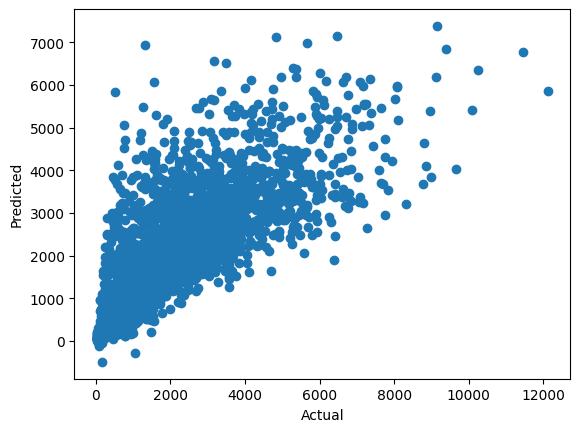

In [251]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

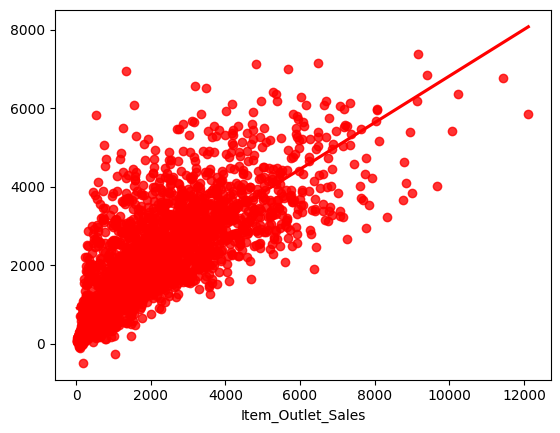

In [252]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [253]:
# Ensure y_test and y_pred are numpy arrays
y_test_array = y_test.to_numpy().flatten() if isinstance(y_test, pd.DataFrame) else np.array(y_test).flatten()
y_pred_array = y_pred.to_numpy().flatten() if isinstance(y_pred, pd.DataFrame) else np.array(y_pred).flatten()

# Convert to pandas Series
y_test_series = pd.Series(y_test_array)
y_pred_series = pd.Series(y_pred_array)

# Create DataFrame
pred_df = pd.DataFrame({'Actual Value': y_test_series, 'Predicted Value': y_pred_series, 'Difference': y_test_series - y_pred_series})
print(pred_df)

      Actual Value  Predicted Value   Difference
0        1868.2348      2221.324119  -353.089319
1         624.5204      1099.969341  -475.448941
2        1677.8160      1389.272531   288.543469
3        2181.1608      1493.184236   687.976564
4         367.5216      1582.785332 -1215.263732
...            ...              ...          ...
2552       88.5514       124.212667   -35.661267
2553      466.0600       781.017091  -314.957091
2554     3340.9844      2442.891809   898.092591
2555     2302.3364      1981.835919   320.500481
2556      743.0328      1567.151631  -824.118831

[2557 rows x 3 columns]
